In [1]:
import numpy as np
import matplotlib.pyplot as plt

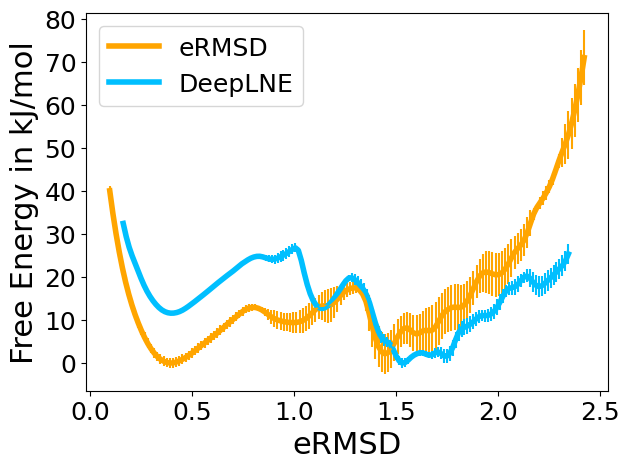

In [2]:
data1=np.load('raw_data/RNA/RNA_FES_eRMSD.npy')
data2=np.load('raw_data/RNA/RNA_FES_DeepLNE.npy')

fig=plt.figure()
plt.errorbar(data1[:,0],data1[:,1],yerr=data1[:,2], color='#FFA500')
plt.errorbar(data2[:,0],data2[:,1],yerr=data2[:,2], color='#00BFFF')
plt.plot(data1[:,0],data1[:,1], color='#FFA500',linewidth=4,label='eRMSD')
plt.plot(data2[:,0],data2[:,1], color='#00BFFF',linewidth=4,label='DeepLNE')
plt.ylabel('Free Energy in kJ/mol',fontsize=22)
plt.xlabel('eRMSD',fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left',fontsize=18,markerscale=5)
plt.tight_layout()
plt.show()

(10,)
(10,)


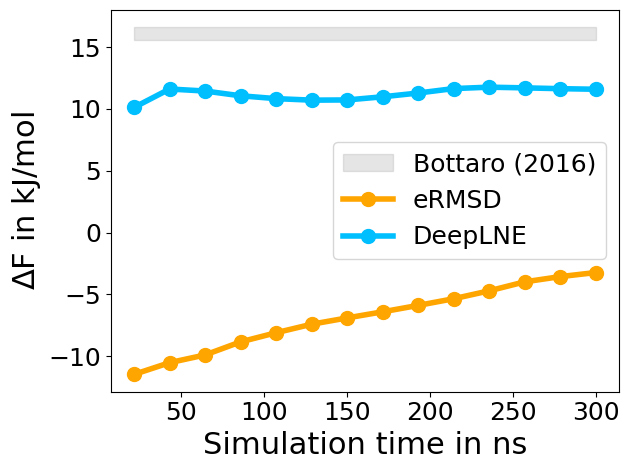

In [3]:
data1=np.load('raw_data/RNA/RNA_deltaF_eRMSD.npy')
data2=np.load('raw_data/RNA/RNA_deltaF_DeepLNE.npy')

data1=-data1
data2=data2

t1=np.linspace(0,300, num=(300 // 20))
t2=np.linspace(0,300, num=(300 // 20) )

t1=t1[1:]
t2=t2[1:]
data1=data1[1:]
data2=data2[1:]

def running_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

window_size = 5

running_avg1 = running_average(data1, window_size)
running_avg2 = running_average(data2, window_size)
running_t1=t1[window_size-1:]
running_t2=t2[window_size-1:]
print(running_t1.shape)
print(running_t2.shape)

fig=plt.figure()
plt.fill_between(t1,16.1-0.5,16.1+0.5,color='gray',alpha=0.2,label='Bottaro (2016)')
plt.plot(t1,data1[:,0],'o-',color='#FFA500',linewidth=4,markersize=10,label='eRMSD')
plt.plot(t2,data2[:,0],'o-',color='#00BFFF',linewidth=4,markersize=10,label='DeepLNE')


plt.xlabel(r'Simulation time in ns',fontsize=22)
plt.ylabel(r'$\Delta$F in kJ/mol',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18,markerscale=1)#,loc='center left')
plt.tight_layout()
plt.show()

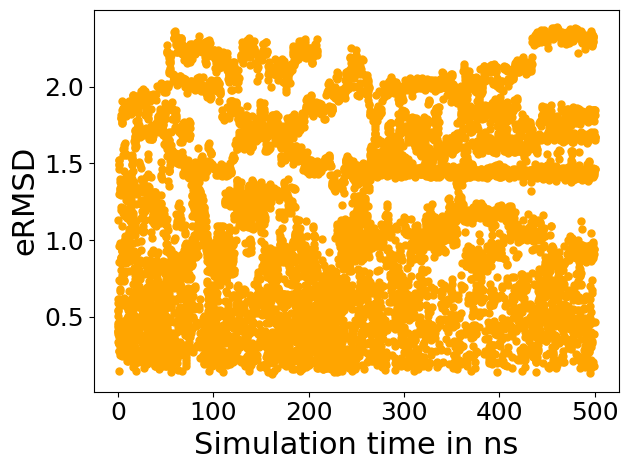

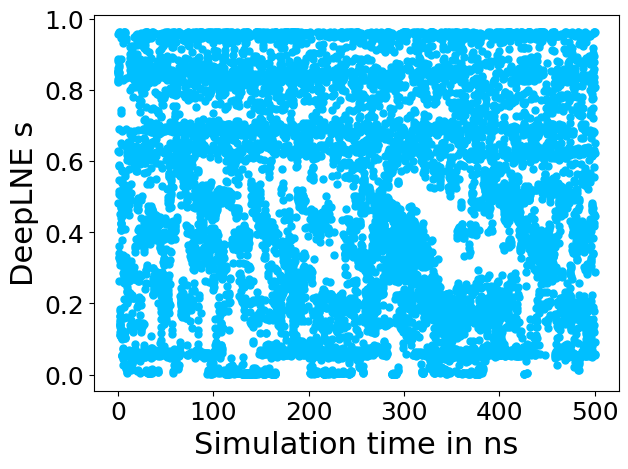

In [6]:
data1=np.load('raw_data/RNA/RNA_colvar_eRMSD.npy')
data2=np.load('raw_data/RNA/RNA_colvar_DeepLNE.npy')

t=np.linspace(0,500, num=(500001))
fig=plt.figure()
plt.plot(t[::50],data1[:,4][::50],'.',color='#FFA500',markersize=10,alpha=1)
plt.xlabel(r'Simulation time in ns',fontsize=22)
plt.ylabel(r'eRMSD',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

fig=plt.figure()
plt.plot(t[::50],data2[:,5][::50],'.',color='#00BFFF',markersize=10,alpha=1)
plt.xlabel(r'Simulation time in ns',fontsize=22)
plt.ylabel(r'DeepLNE s',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()